# JAFUNO PROJET Controle Qualité  16/12/2019

### Qualite-JAFUNO.csv

In [3]:
data1<- read.table('//home/jafuno/Téléchargements/Controle Qualité/Qualite-JAFUNO.csv', header = TRUE,sep=",")
data<- data1[,2:109]

In [4]:
head(data)

Date,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108
6885.434,8620.503,8903.216,13130.45,11131.088,6519.5178,0.3901023,2.305189,1.766009,1.7789040,...,8.501358,6.655823,4.378771,7.203149,6.831165,7.237953,7.429112,7.174358,1.2210362,1.889258
10934.471,8707.748,8762.200,13149.41,2607.214,5335.8661,2.1960414,2.298841,1.922416,2.6567498,...,4.982161,12.031019,8.281026,7.706718,4.575324,9.277990,6.515534,7.271438,0.7052113,2.177741
6907.490,8527.289,9006.014,13144.05,4374.358,25737.3092,1.3247141,1.901779,1.364063,1.0512042,...,6.593759,7.484890,8.607846,7.897583,11.573471,9.633916,6.280205,10.352274,2.1485851,2.905065
7136.301,8699.658,8652.489,13087.37,3050.461,256.2939,2.9486380,1.817420,1.923744,0.7579353,...,6.069911,7.446334,4.508785,11.768749,9.910916,6.605336,6.697249,6.889108,2.7564443,1.011348
18597.949,8905.560,8802.194,13131.98,4323.867,13894.3131,1.6346265,1.393835,2.258834,1.9948030,...,6.060440,6.253521,8.577804,6.842956,4.245732,6.906305,9.321372,5.862226,1.7737652,1.028602
6272.575,8742.773,8599.898,13145.13,5574.604,22.5561,2.0612067,2.057807,1.874150,2.8658075,...,9.680542,6.630408,7.378135,6.139431,4.782097,8.697008,7.386381,5.394720,1.2466970,1.639564


## 1) Loi des 6 premières colonnes 

### qqplot

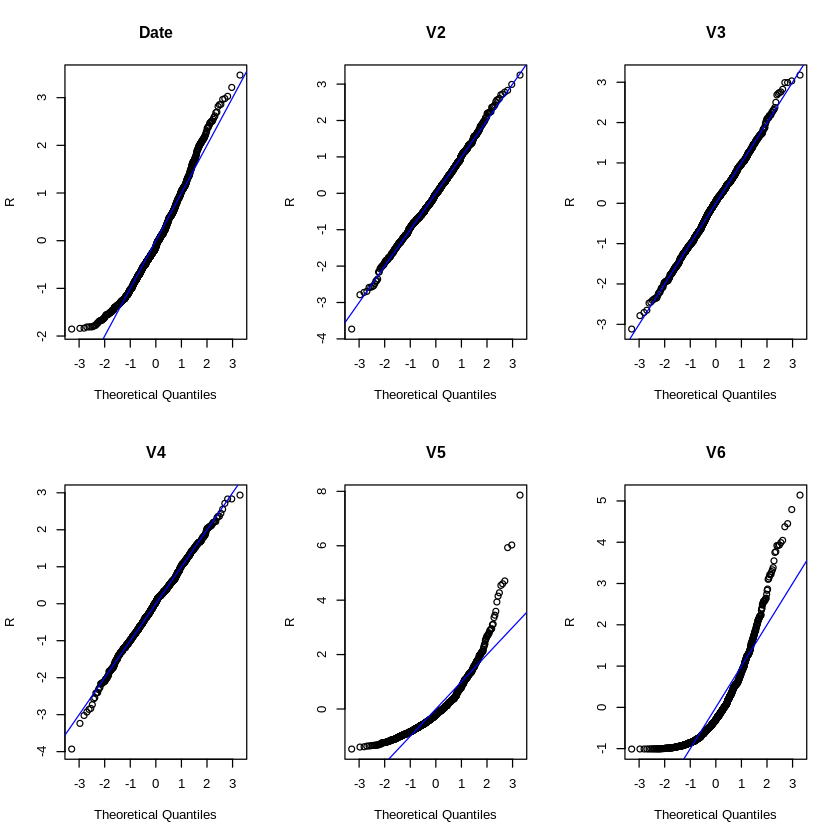

In [5]:

par(mfrow=c(2,3))
for(i in 1:6){

    data2 <- (data[,i]- mean(data[,i]))/sd(data[,i])
#Xbar <- (Xbar- mean(Xbar))/sd(Xbar)
qqnorm(data2,ylab='R', main = names(data[i]))
#distribution normales de R 
abline(0, 1, col='blue')
}



Toutes les variables semblent suivre une loi **Normale** sauf Date, V5 et V6 faisons un test de Shapiro pour confirmer cela 

In [6]:
shapiro.test(data[,1])


	Shapiro-Wilk normality test

data:  data[, 1]
W = 0,9745, p-value = 3,012e-12


In [7]:
shapiro.test(data[,5])


	Shapiro-Wilk normality test

data:  data[, 5]
W = 0,85041, p-value < 2,2e-16


In [8]:
shapiro.test(data[,6])


	Shapiro-Wilk normality test

data:  data[, 6]
W = 0,83382, p-value < 2,2e-16


Les 3 pvalues sont significatives et donc Date V5 et V6 ne suivent pas une loi normale 

### Histogrammes de Date, V5 et V6

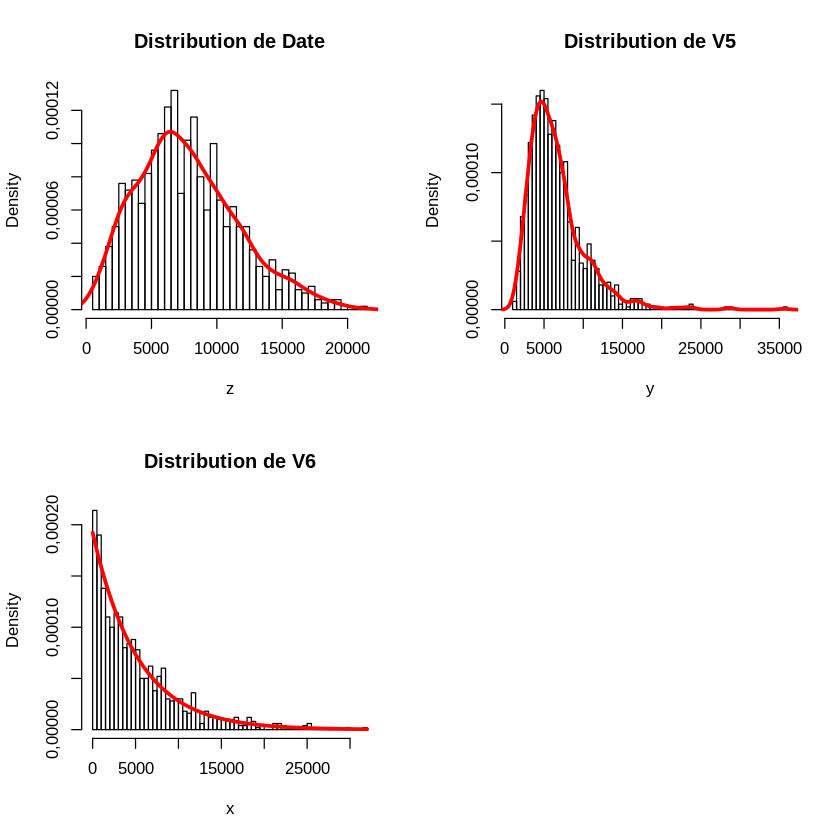

In [9]:
par(mfrow=c(2,2))
z=data[,1]
hist(z, breaks =50, freq= F,main= "Distribution de Date")
lines(density(z), col= 'red',lwd=3)

y=data[,5]
hist(y, breaks =50, freq= F,main= "Distribution de V5")
lines(density(y), col= 'red',lwd=3)

x<-data[,6]
hist(x, breaks =50, freq= F,main= "Distribution de V6")
curve(dexp(x,1/mean(data[,6])), col = "red",lwd=3, add = TRUE)  ## Bonne adéquation à une loi exponentielle 
##,ylim=c(0,0.00015) ,xlim=c(0,30000)

On voit que V6 semblent suivre une loi **exponnentielle**, que Date une loi de type **Weibull** et V5 une loi de type **Log Normal**

## 2) Carte de Controle

In [10]:
datachart<- data[,7:106]
head(datachart)

V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,...,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106
"0,3901023","2,305189","1,766009","1,7789040","1,435421","2,742302","1,708236","2,525970","1,7922025","2,565676",...,"7,397260","11,192278","8,501358","6,655823","4,378771","7,203149","6,831165","7,237953","7,429112","7,174358"
"2,1960414","2,298841","1,922416","2,6567498","2,247887","1,594490","2,003579","1,894161","2,5414300","2,299044",...,"10,463558","6,834040","4,982161","12,031019","8,281026","7,706718","4,575324","9,277990","6,515534","7,271438"
"1,3247141","1,901779","1,364063","1,0512042","1,774624","2,741821","2,032588","1,830209","2,3713170","2,213992",...,"6,135284","7,191626","6,593759","7,484890","8,607846","7,897583","11,573471","9,633916","6,280205","10,352274"
"2,9486380","1,817420","1,923744","0,7579353","2,387034","1,300430","2,046088","2,099705","2,4016411","1,832437",...,"4,488158","6,000473","6,069911","7,446334","4,508785","11,768749","9,910916","6,605336","6,697249","6,889108"
"1,6346265","1,393835","2,258834","1,9948030","1,675601","1,847252","2,266560","2,137983","1,7101801","1,673991",...,"8,372307","8,884302","6,060440","6,253521","8,577804","6,842956","4,245732","6,906305","9,321372","5,862226"
"2,0612067","2,057807","1,874150","2,8658075","1,951794","1,776818","1,680203","1,946843","0,9566565","2,137658",...,"8,420229","5,249355","9,680542","6,630408","7,378135","6,139431","4,782097","8,697008","7,386381","5,394720"


In [11]:
library(SixSigma)# pour les coefficients 
n=100
d2<-ss.cc.getd2(n=100)
d3<-ss.cc.getd3(n=100)
A2<-3/(d2*sqrt(n))
D4=1+(3*d3/d2)
D3=1-(3*d3/d2) 
c4<-4*(n-1)/(4*n-3)
A3<-3/(c4*sqrt(n))
B3<-1-(3/(c4*sqrt(2*(n-1))))
B4<-1+(3/(c4*sqrt(2*(n-1))))


### Carte Xbar, R colonne 7 à 106

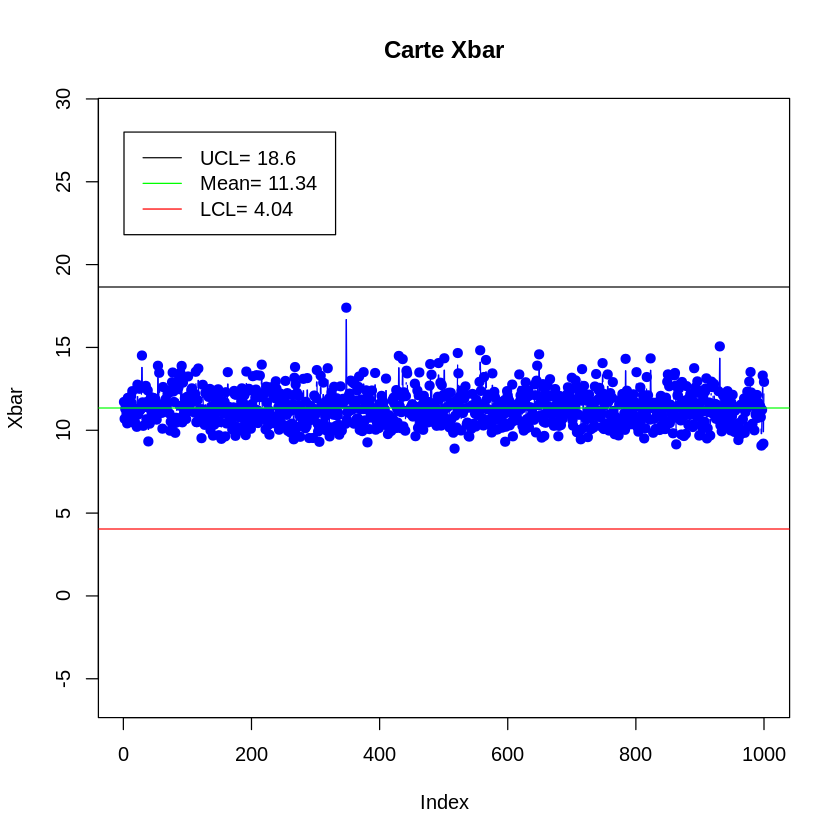

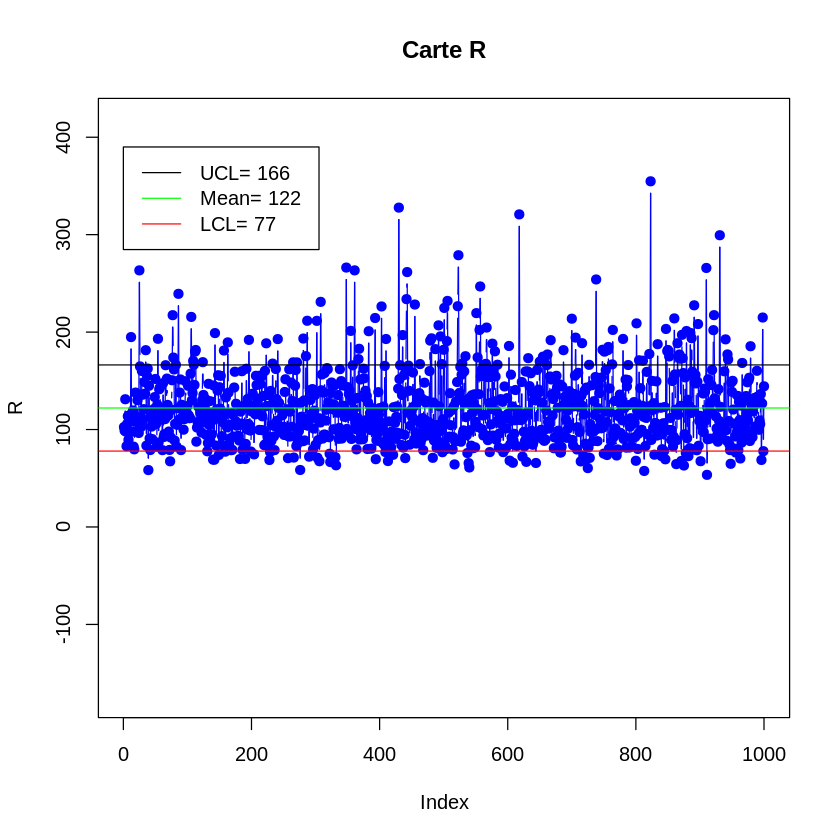

In [12]:
Xbar<-apply(datachart, 1,mean) 
w<-apply(datachart, 1,range) 
R<-w[2,]-w[1,]
Xbarbar = mean(Xbar)

Rbar= mean(R)

lcl = Xbarbar - A2*Rbar
ucl = Xbarbar + A2*Rbar

lclR=D3*Rbar
uclR=D4*Rbar

#par(mfrow=c(2,1))
plot(Xbar, col= 'blue', ylim=c(lcl-10,ucl+10),type="b",pch=19, main ='Carte Xbar')
abline(Xbarbar,0, col ='green')
abline(ucl,0, col ='black')
abline(lcl,0, col ='red')
legend(1,28,c("UCL= 18.6","Mean= 11.34","LCL= 4.04"),col=c('black','green','red'),lty = 1)

plot(R, col= 'blue', ylim=c(lclR-250,uclR+250),type="b",pch=19, main = 'Carte R')
abline(Rbar,0, col ='green')
abline(uclR,0, col ='black')
abline(lclR,0, col ='red')
legend(0,390,c("UCL= 166","Mean= 122","LCL= 77"),col=c('black','green','red'),lty = 1)

#### Le signal du processus est sous controle pour Xbar mais pas pour R ou l'on voit plusieurs points en dessous ou au dela des valeurs de controles 

### Carte Xbar, S colonne 7 à 106

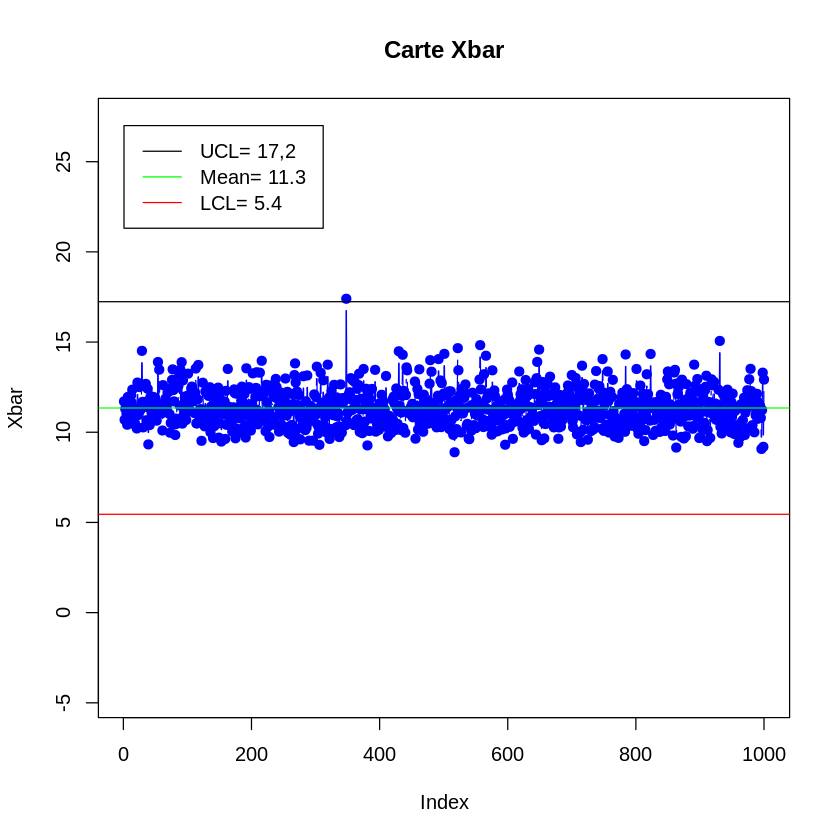

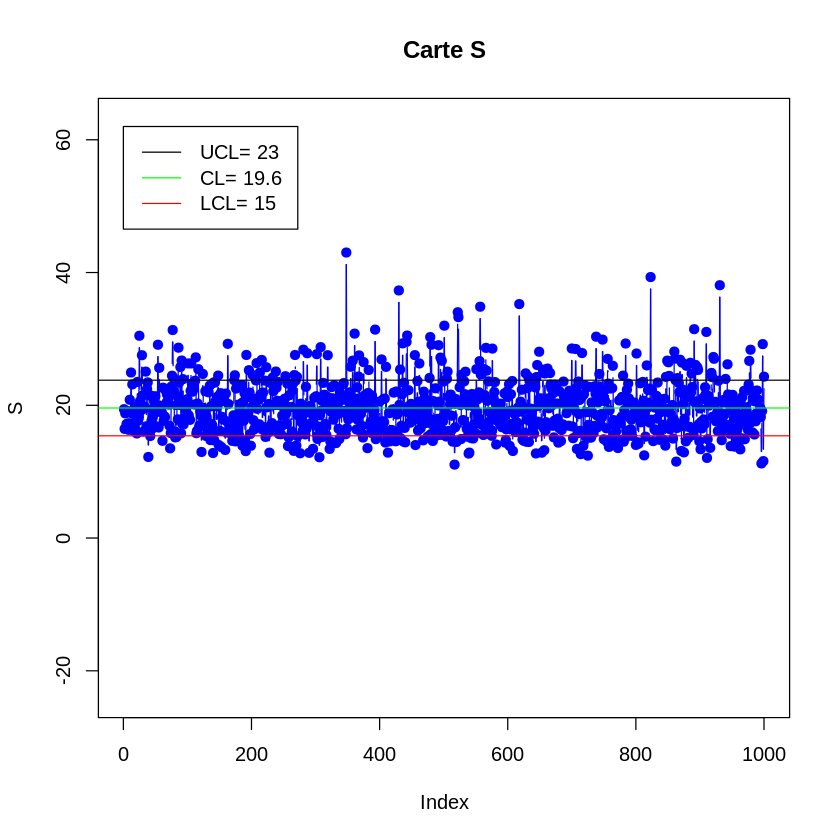

In [13]:
S<-apply(datachart, 1,sd) 
Sbar= mean(S)
A3=3/(c4*sqrt(n))
B3=1-(3/(c4*sqrt(2*(n-1)))) 
B4=1+(3/(c4*sqrt(2*(n-1)))) 
Sbar= mean(S)
lcl = Xbarbar - A3*Sbar
ucl = Xbarbar + A3*Sbar


uclS=B4*Sbar
lclS=B3*Sbar


plot(Xbar, col= 'blue', ylim=c(lcl-10,ucl+10),type="b",pch=19, main ='Carte Xbar')
abline(Xbarbar,0, col ='green')
abline(ucl,0, col ='black')
abline(lcl,0, col ='red')
legend(1,27,c("UCL= 17,2 ","Mean= 11.3","LCL= 5.4"),col=c('black','green','red'),lty = 1)

plot(S, col= 'blue', ylim=c(lclS-39,uclS+39),type="b",pch=19, main = 'Carte S')
abline(Sbar,0, col ='green')
abline(uclS,0, col ='black')
abline(lclS,0, col ='red')
legend(0,62,c("UCL= 23","CL= 19.6","LCL= 15"),col=c('black','green','red'),lty = 1)


#### Le signal du processus n'est pas sous controle pour les 2 cartes, pour Xbar on a un point hors de controle

### Carte Cusum pour V107

In [14]:
d107<- data[,107]
head(d107)

[1] 1,2210362 0,7052113 2,1485851 2,7564443 1,7737652 1,2466970

Estimation de sigma

In [15]:
#Estimation de sigma
MR<-c() # CQ3 page 29

for( i in 1:999){
  MR[i]<- abs(d107[i+1]-d107[i])
}
MRbar= mean(MR)
sigma= MRbar/ 1.128

#### On prend donc pour la suite k= 0.25 et H= 8.01 et sigma= 16,08597

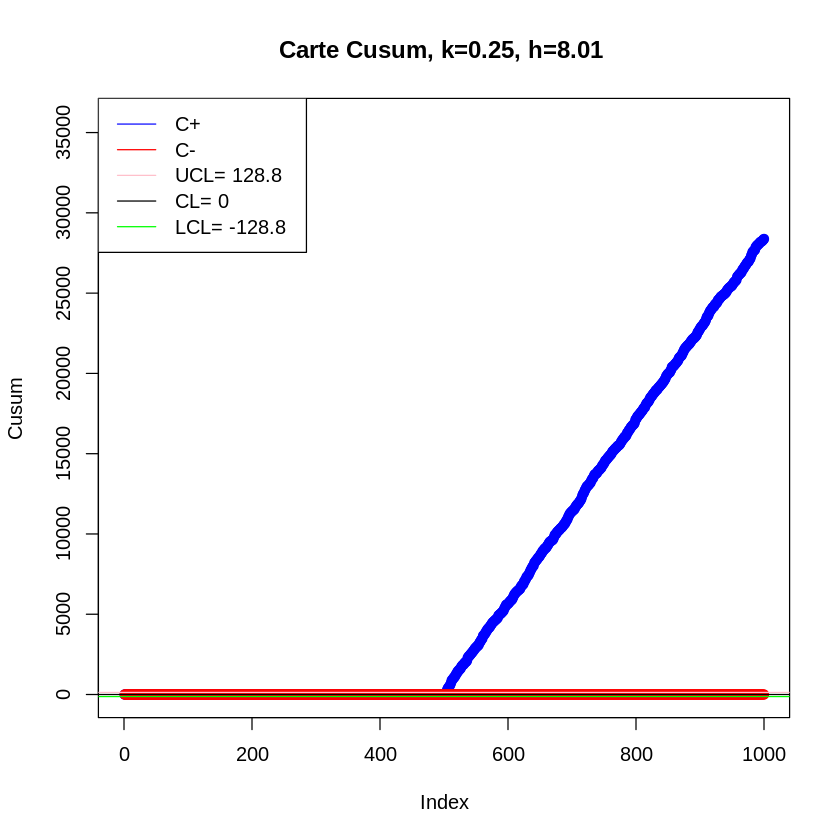

In [27]:
d107<- data[,107]
#mean(d107[1:2])
mu0 =2# On veut detecter un changement par rapportà une moyenne égal à 2
k=0.25
K=k*sigma

h=8.01
H=h*sigma
UCL=H
Cusum<-c()
Cusum[1]=0
for(i in 2:1000){
  Cusum[i] = max(0,d107[i]-(mu0+K)+ Cusum[i-1])
}

D<-c()
D[1]=0
for(i in 2:1000){
  D[i] = max(0,(mu0-K)-d107[i]+ D[i-1])
}
plot(Cusum,ylim=c(-10,35700),xlim=c(0,1000), col= 'blue',type="b",pch=19,main='Carte Cusum, k=0.25, h=8.01 ')
lines(D,ylim=c(-0.5,0.5),xlim=c(0,26), col= 'red',type="b",pch=19)
abline(0,0,col='black')
abline(H,0,col='pink',lty = 1)
abline(-H,0,col='green',lty = 1)
legend("topleft",c("C+","C-","UCL= 128.8 ","CL= 0","LCL= -128.8"),col=c('blue','red','pink','black','green'),lty = 1)



In [18]:
a<-c()
for(i in 1:1000){
    a[i]<-(Cusum[i]<H)
}
n=sum(a)
print(paste("Le signal du processus n'est pas sous controle, les pts après le",as.character(n),'ème dépassent les limites de controle'))

[1] "Le signal du processus n'est pas sous controle, les pts après le 503 ème dépassent les limites de controle"


### Carte EWMA pour V107

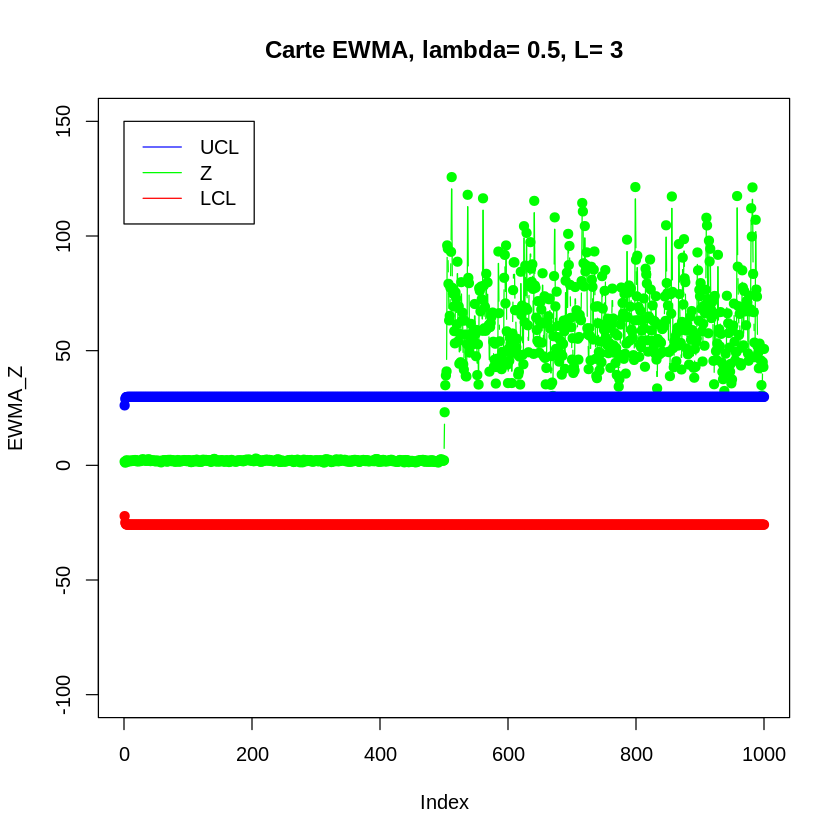

In [19]:
#EWMA
lambda=0.5
mu0=2
L=3
EWMA_Z<-c()
EWMA_Z[1]=lambda*d107[1]+(1-lambda)*mu0
for(i in 2:1000){
  EWMA_Z[i]=lambda*d107[i]+(1-lambda)*EWMA_Z[i-1]
}
LCL<-c()
for(i in 1:1000){
  LCL[i]<- mu0 -L*sigma*sqrt((lambda/(2-lambda))*(1-(1-lambda)^(2*i)))
}

#LCl<- mu0 -L*sigma*sqrt((lambda/(2-lambda)))
                    

UCL<-c()
for(i in 1:1000){
  UCL[i]<- mu0 +L*sigma*sqrt((lambda/(2-lambda))*(1-(1-lambda)^(2*i)))
}


plot(EWMA_Z,ylim=c(-100,150),xlim=c(0,1000), col= 'green',type="b",pch=19, main = 'Carte EWMA, lambda= 0.5, L= 3')
lines(UCL,ylim=c(7.96,8.13),xlim=c(0,1000), col= 'blue',type="b",pch=19)
lines(LCL,ylim=c(7.96,8.13),xlim=c(0,1000),col= 'red',type="b",pch=19)
legend(0,150,c("UCL","Z","LCL"),col=c('blue','green','red'),lty = 1)

In [20]:
for(i in 1:1000){
    a[i]<-(EWMA_Z[i]<max(UCL))
}
n=sum(a)
print(paste("Le signal du processus n'est pas sous controle, les pts après le",as.character(n),"ème dépassent les limites de controle"))

[1] "Le signal du processus n'est pas sous controle, les pts après le 501 ème dépassent les limites de controle"


### Carte Cusum pour V108

In [21]:
d108<- data[,108]
head(d108)

[1] 1,889258 2,177741 2,905065 1,011348 1,028602 1,639564

Estimation de sigma

In [22]:
MR<-c() # CQ3 page 29

for( i in 1:999){
  MR[i]<- abs(d108[i+1]-d108[i])
}
MRbar= mean(MR)
sigma2= MRbar/ 1.128

#### On prend donc pour la suite k= 0.5 et H= 4.77 et sigma= 0,505158885367955

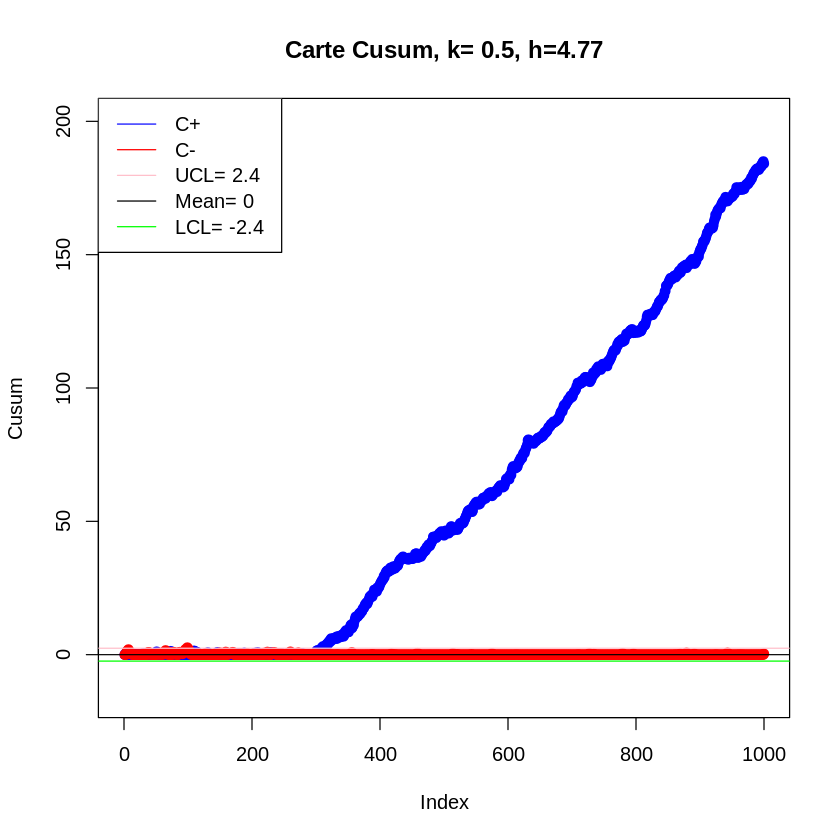

In [23]:
d108<- data[,108]
mu0 =2# On veut detecter un changement par rapport à une moyenne égal à 2
k=0.5
K=k*sigma2
h=4.77
H=h*sigma2
UCL=H
UCL=H
Cusum<-c()
Cusum[1]=0
for(i in 2:1000){
  Cusum[i] = max(0,d108[i]-(mu0+K)+ Cusum[i-1])
}
D<-c()
D[1]=0
for(i in 2:1000){
  D[i] = max(0,(mu0-K)-d108[i]+ D[i-1])
}
plot(Cusum,ylim=c(-15,200),xlim=c(0,1000), col= 'blue',type="b",pch=19,main='Carte Cusum, k= 0.5, h=4.77')
lines(D,ylim=c(-0.5,0.5),xlim=c(0,26), col= 'red',type="b",pch=19)
abline(0,0,col='black')
abline(H,0,col='pink')
abline(-H,0,col='green')
legend("topleft",c("C+","C-","UCL= 2.4 ","Mean= 0","LCL= -2.4"),col=c('blue','red','pink','black','green'),lty = 1)



In [24]:

for(i in 1:1000){
    a[i]<-(Cusum[i]<H)
    if(D[i]>H){m=i}
}
n=sum(a)

print(paste("Le signal du processus n'est pas sous controle, Pour C+ les points après le",as.character(n),'ème dépassent les limites de controle'))
print(paste("pour C- seul le",as.character(m),"ème point est hors des limites de controle"))

[1] "Le signal du processus n'est pas sous controle, Pour C+ les points après le 308 ème dépassent les limites de controle"
[1] "pour C- seul le 99 ème point est hors des limites de controle"


### Carte EWMA pour V108

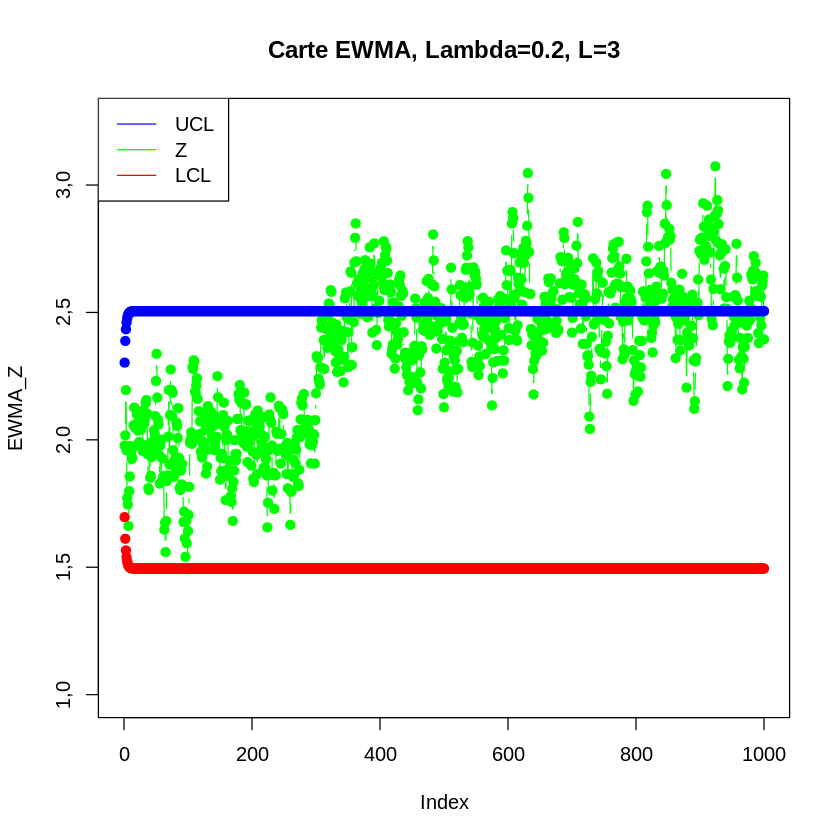

In [25]:
#EWMA
lambda=0.2
mu0=2
L=3
EWMA_Z<-c()
EWMA_Z[1]=lambda*d108[1]+(1-lambda)*mu0
for(i in 2:1000){
  EWMA_Z[i]=lambda*d108[i]+(1-lambda)*EWMA_Z[i-1]
}
LCL<-c()
for(i in 1:1000){
  LCL[i]<- mu0 -L*sigma2*sqrt((lambda/(2-lambda))*(1-(1-lambda)^(2*i)))
}
             

UCL<-c()
for(i in 1:1000){
  UCL[i]<- mu0 +L*sigma2*sqrt((lambda/(2-lambda))*(1-(1-lambda)^(2*i)))
}

plot(EWMA_Z,ylim=c(1,3.25),xlim=c(0,1000), col= 'green',type="b",pch=19, main = 'Carte EWMA, Lambda=0.2, L=3')
lines(UCL,ylim=c(7.96,8.13),xlim=c(0,24), col= 'blue',type="b",pch=19)
lines(LCL,ylim=c(7.96,8.13),xlim=c(0,24),col= 'red',type="b",pch=19)
legend("topleft",c("UCL","Z","LCL"),col=c('blue','green','red'),lty = 1)


**le signal du processus n'est pas sous controle** 